In [ ]:
# Pollster Dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
poll_df = pd.read_csv("http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv")

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


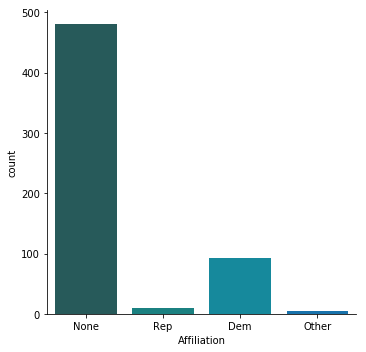

In [6]:
sns.catplot('Affiliation',data=poll_df,kind='count',palette='winter_d')

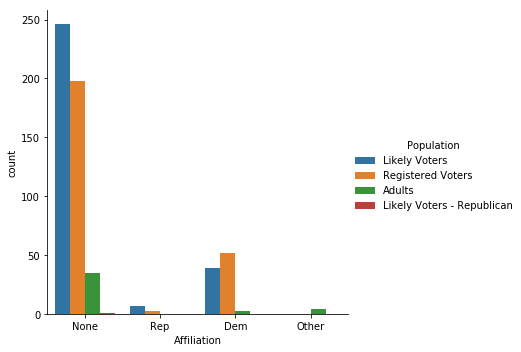

In [7]:
sns.catplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [8]:
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations','Question Text','Question Iteration','Other'],inplace=True)

In [9]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [10]:
std = pd.DataFrame(poll_df.std())

std.drop(['Number of Observations','Question Text','Question Iteration','Other'],inplace=True)

In [11]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


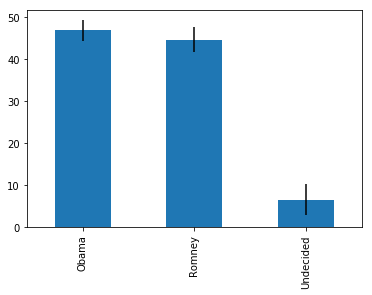

In [12]:
avg.plot(yerr=std,kind='bar',legend=False)

In [13]:
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns=['Average','STD']

In [14]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


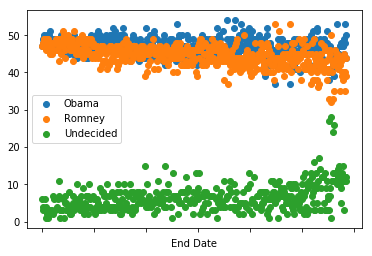

In [15]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [17]:
poll_df['Difference'] = (poll_df['Obama']-poll_df['Romney'])/100

In [18]:
poll_df.head(3)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00


In [19]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean().drop(['Other','Question Text','Question Iteration'],axis=1)

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


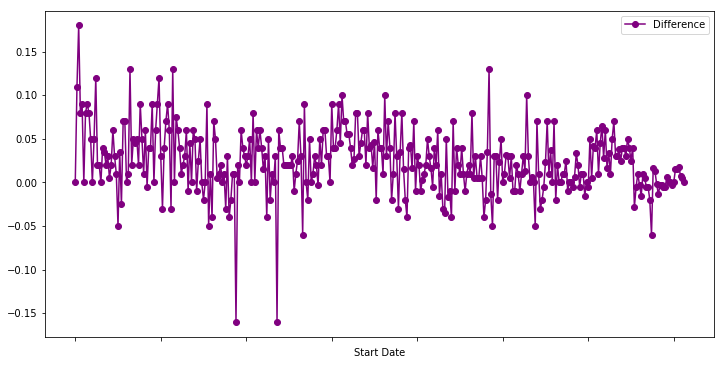

In [20]:
poll_df.plot('Start Date','Difference',figsize=[12,6],marker='o',linestyle='-',color='purple')

In [21]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
print(xlimit[0])
print(xlimit[-1])

325
352


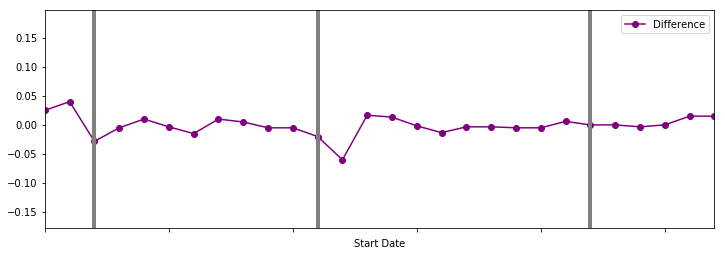

In [24]:
poll_df.plot('Start Date','Difference',figsize=[12,4],marker='o',linestyle='-',color='purple',xlim=[325,352])

#Oct 3rd
plt.axvline(x=325+2,linewidth=4,color='grey')
#Oct 11th
plt.axvline(x=325+11,linewidth=4,color='grey')
#Oct 22nd
plt.axvline(x=325+22,linewidth=4,color='grey')